# Imports

In [1]:
#Import all the necessary python libraries
import pymzml
import csv
import os
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import json
from scipy.integrate import trapz

#Import all the necessary CLAW libraries
import create_directory
import CLAW
import matplotlib.pyplot as plt
import warnings

import re
from sklearn.mixture import GaussianMixture
import tqdm

# Suppress all warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
name_of_project = 'AMP'


# Separate OzON and OzOFF mzml files incase they weren't seprated before

In [2]:
#After you load mzml files to mzml folder. this will filter the files and move them to o3on and o2only folders
create_directory.filter_o3mzml_files(name_of_project)

The directory 'Projects/AMP/mzml' does not exist. Please try again with a valid directory.


# Database Location, Project Location, and CLAW Preparsing setup

In [3]:
# Set default values
data_base_name_location = 'lipid_database/AMP_Database_OzOFF.xlsx'
Project = './Projects/'
Project_Name = 'AMP'
Project_Folder_data = Project + Project_Name + '/fame_mix/off/'
Project_results = Project + Project_Name + '/results/fame_mix/'
file_name_to_save = 'AMP'
tolerance = 0.3
remove_std = True
save_data = True

# Call pre_parsing_setup to initialize the variables
data_base_name_location, Project_Folder_data, Project_results, file_name_to_save, tolerance, remove_std, save_data = CLAW.pre_parsing_setup(data_base_name_location,
 Project, 
 Project_Name, 
 Project_Folder_data,
 Project_results, 
 file_name_to_save, 
 tolerance, 
 remove_std,
 save_data)


data_base_name_location: lipid_database/AMP_Database_OzOFF.xlsx
Project: ./Projects/
Project_Name: AMP
Project_Folder_data: ./Projects/AMP/fame_mix/off/
Project_results: ./Projects/AMP/results/fame_mix/
file_name_to_save: AMP
tolerance: 0.3
remove_std: True
save_data: True


# OzESI setup

In [4]:
time_and_intensity_df, master_df, OzESI_time_df = CLAW.create_analysis_dataframes()

# CLAW with OzESI

In [5]:
# Use the initialized variables as arguments to full_parse
df_MRM, df_OzESI = CLAW.full_parse(data_base_name_location, 
                                               Project_Folder_data, 
                                               Project_results, 
                                               file_name_to_save, 
                                               tolerance, 
                                               remove_std=True, 
                                               save_data=False,
                                               batch_processing=True,
                                               plot_chromatogram=False)

/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Parent_Ion'] = np.round(lipid_MRM_data['Parent_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lipid_MRM_data['Product_Ion'] = np.round(lipid_MRM_data['Product_Ion'], 1)
/home/iyer95/CLAW/CLAW/lipid_platform/CLAW.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

Finished parsing mzML file: ./Projects/AMP/fame_mix/off/11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3off_01.mzML

Finished parsing all mzML files



# Double check DFs

In [6]:
df_MRM.head(None)
df_OzESI

,Lipid,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition
0,NaN,255.2,183.0,0.024400,41.220001,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,255.2 -> 183.0
1,NaN,255.2,183.0,0.050617,63.000004,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,255.2 -> 183.0
2,NaN,255.2,183.0,0.076850,102.880005,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,255.2 -> 183.0
3,NaN,255.2,183.0,0.103083,130.680008,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,255.2 -> 183.0
4,NaN,255.2,183.0,0.129317,110.940010,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,255.2 -> 183.0
...,...,...,...,...,...,...,...
58390,NaN,533.5,183.0,28.252500,41.300003,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,533.5 -> 183.0
58391,NaN,533.5,183.0,28.278733,41.340004,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,533.5 -> 183.0
58392,NaN,533.5,183.0,28.304967,41.360004,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,533.5 -> 183.0
58393,NaN,533.5,183.0,28.331200,41.320004,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,533.5 -> 183.0


# RawDataParser 
### Class for creating Match Group, extracting details from Sample ID, FAC and then parsing all the data and making a dataframe ready to be used to find peaks

In [7]:
import pandas as pd

class RawDataParser:
    def __init__(self, df_MRM, df_OzESI):
        self.df_MRM = df_MRM
        self.df_OzESI = df_OzESI
    
    def create_match_group(self, df):
        df['Match_Group'] = df.groupby(['Parent_Ion', 'Product_Ion', 'Sample_ID']).ngroup()
        return df
    
    def filter_retention_time(self, df, retention_time_range):
        df_filtered = df[(df['Retention_Time'] >= retention_time_range[0]) & (df['Retention_Time'] <= retention_time_range[1])]
        return df_filtered
    
    def is_within_tolerance(self, ion1, ion2, tolerance=0.3):
        return abs(ion1 - ion2) <= tolerance
    
    def match_lipids(self, d1a, d1b):
        if 'Match_Group' not in d1a.columns:
            d1a['Match_Group'] = d1a.groupby(['Parent_Ion', 'Product_Ion', 'Sample_ID']).ngroup()
        
        d1b['Match_Group'] = d1a['Match_Group']
        d1b['Lipid'] = None
        
        for group in d1a['Match_Group'].unique():
            group_row = d1a[d1a['Match_Group'] == group].iloc[0]
            
            for _, mrm_row in self.df_MRM.iterrows():
                if self.is_within_tolerance(group_row['Parent_Ion'], mrm_row['Parent_Ion']) and self.is_within_tolerance(group_row['Product_Ion'], mrm_row['Product_Ion']):
                    d1b.loc[d1b['Match_Group'] == group, 'Lipid'] = mrm_row['Lipid']
                    break
        
        return d1b
    
    def extract_details_from_sample_id(self, df, column_name='Sample_ID', new_columns=None):
        if new_columns is None or not isinstance(new_columns, dict):
            raise ValueError("new_columns must be a dictionary with column names as keys and list of strings as values")
        
        for col, values in new_columns.items():
            pattern = f"(?P<{col}>{'|'.join(values)})"
            df_extracted = df[column_name].str.extract(pattern)
            df = pd.concat([df, df_extracted[[col]]], axis=1)
        
        return df
   
    def extract_fac_values(self, df):
        def extract_fac(lipid):
            if pd.isna(lipid):
                return []
            return re.findall(r'\d+:\d+', lipid)
        
        df['FAC'] = df['Lipid'].apply(extract_fac)
        return df
    
    def group(self, df, group_columns=None):
        if group_columns is None:
            group_columns = ['Lipid', 'Sample_ID','Biology','Genotype','Mouse','Cage']
        
        if not isinstance(group_columns, list):
            raise ValueError("group_columns must be a list of column names")
        
        invalid_columns = set(group_columns) - set(df.columns)
        if invalid_columns:
            raise ValueError(f"The following columns are not present in the DataFrame: {', '.join(invalid_columns)}")
        
        df['Group_Sample'] = df.groupby(group_columns).ngroup()
        return df
    
    def parse_data(self, retention_time_range, new_columns, group_columns=None):
        self.df_MRM = self.create_match_group(self.df_MRM)
        
        d1 = self.df_OzESI.iloc[:, 1:]
        d1a = self.filter_retention_time(d1, retention_time_range)
        d1a = self.create_match_group(d1a)
        
        d1b = d1a.copy()
        d1b = self.match_lipids(d1a, d1b)
        
        d1c = d1b.copy()
        d1c = self.extract_details_from_sample_id(d1c, new_columns=new_columns)
        d1c = self.extract_fac_values(d1c)
        
        d1d = d1c.copy()
        d1d = self.group(d1d, group_columns)
        
        return d1d
    
    def plot_full_spectrum(self, d1a):
        plt.figure(figsize=(10, 6))
        plt.scatter(d1a['Retention_Time'], d1a['OzESI_Intensity'])
        plt.xlabel('Retention Time')
        plt.ylabel('OzESI Intensity')
        plt.title('Retention Time vs OzESI Intensity')
        plt.show()

# Run RawDataParser
### 

In [8]:
parser = RawDataParser(df_MRM, df_OzESI)
# Define the retention time range and new columns
retention_time_range = (0, 15)
new_columns = {'Biology': ['cortex', 'dienc', 'hippo', 'cereb'],
               'Genotype': ['5xFAD', 'WT'],
               'Cage': ['FAD231', 'FAD245', 'FAD249', 'FAD257', 'FAD263'],
               'Mouse': ['m1', 'm2', 'm3', 'm4', 'm5']}
#group data
group_columns = ['Lipid', 'Sample_ID', 'Biology', 'Genotype', 'Mouse', 'Cage']

#group columns of STANDARDS
group_columns = ['Lipid']

# Parse the data
parsed_data = parser.parse_data(retention_time_range, new_columns, group_columns)

/home/iyer95/.conda/envs/CLA/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


# Plot Full Spectrum to see if data is good

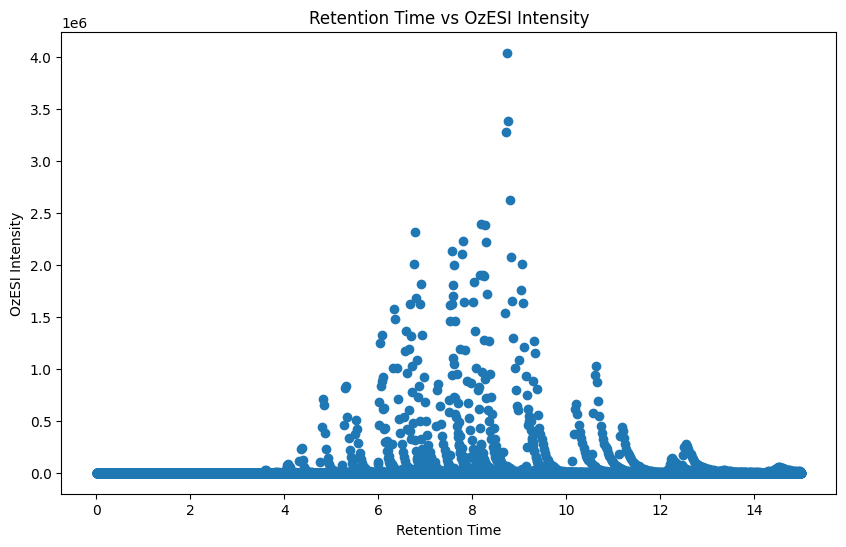

,Parent_Ion,Product_Ion,Retention_Time,OzESI_Intensity,Sample_ID,Transition,Match_Group,Lipid,Biology,Genotype,Cage,Mouse,FAC,Group_Sample
0,255.2,183.0,0.024400,41.220001,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,255.2 -> 183.0,0,4:0,NaN,NaN,NaN,NaN,[4:0],29
1,255.2,183.0,0.050617,63.000004,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,255.2 -> 183.0,0,4:0,NaN,NaN,NaN,NaN,[4:0],29
2,255.2,183.0,0.076850,102.880005,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,255.2 -> 183.0,0,4:0,NaN,NaN,NaN,NaN,[4:0],29
3,255.2,183.0,0.103083,130.680008,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,255.2 -> 183.0,0,4:0,NaN,NaN,NaN,NaN,[4:0],29
4,255.2,183.0,0.129317,110.940010,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,255.2 -> 183.0,0,4:0,NaN,NaN,NaN,NaN,[4:0],29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57880,533.5,183.0,14.873617,41.160004,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,533.5 -> 183.0,52,24:1,NaN,NaN,NaN,NaN,[24:1],28
57881,533.5,183.0,14.899850,41.180004,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,533.5 -> 183.0,52,24:1,NaN,NaN,NaN,NaN,[24:1],28
57882,533.5,183.0,14.926083,41.200005,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,533.5 -> 183.0,52,24:1,NaN,NaN,NaN,NaN,[24:1],28
57883,533.5,183.0,14.952317,41.180004,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,533.5 -> 183.0,52,24:1,NaN,NaN,NaN,NaN,[24:1],28


In [9]:
# Plot the full spectrum
parser.plot_full_spectrum(parsed_data)
parsed_data

# PeakAnalysis Class
### find peaks, RT and peak area 
### input df from RawDataParser and output is df

In [10]:
import pandas as pd
from scipy.signal import find_peaks, peak_widths

class PeakAnalysis:
    def __init__(self, data):
        self.data = data

    def find_lipid_peaks(self, use_match_group=True, height=None, width=None):
        """
        Find peaks in lipid data based on retention time and intensity, and extract relevant metadata.

        Parameters:
        - use_match_group: boolean flag to determine filtering by 'Match_Group' or 'Group_Sample'.
        - height: Minimum height of peaks. Used as a threshold for peak intensity.
        - width: Minimum width of peaks in number of samples. Helps in distinguishing real peaks from noise.

        Returns:
        - peaks_df: DataFrame containing the peak data with additional metadata and calculated metrics.
        """
        filter_col = 'Match_Group' if use_match_group else 'Group_Sample'
        unique_groups = self.data[filter_col].unique()
        peak_data = []

        for group in unique_groups:
            group_data = self.data[self.data[filter_col] == group]
            peaks, properties = find_peaks(group_data['OzESI_Intensity'], height=height, width=width)
            results_half = peak_widths(group_data['OzESI_Intensity'], peaks, rel_height=0.5)

            for i, peak in enumerate(peaks):
                metadata = group_data.iloc[peak][['Parent_Ion', 'Product_Ion', 'FAC', 'Group_Sample', 'Match_Group', 'Biology', 'Genotype', 'Cage', 'Mouse', 'Lipid']]
                peak_data.append({
                    'Lipid': metadata['Lipid'],
                    'Retention_Time': group_data.iloc[peak]['Retention_Time'],
                    'OzESI_Intensity': group_data.iloc[peak]['OzESI_Intensity'],
                    'Match_Group': metadata['Match_Group'],
                    'Group_Sample': metadata['Group_Sample'],
                    'Sample_ID': group_data.iloc[peak]['Sample_ID'],
                    'Parent_Ion': metadata['Parent_Ion'],
                    'Product_Ion': metadata['Product_Ion'],
                    'FAC': metadata['FAC'],
                    'Biology': metadata['Biology'],
                    'Genotype': metadata['Genotype'],
                    'Cage': metadata['Cage'],
                    'Mouse': metadata['Mouse'],
                    'Peak_Height': properties['peak_heights'][i],
                    'FWHM': results_half[1][i],  # Full width at half maximum
                    'Peak_Width': results_half[0][i],  # Width of the peak in samples
                    'Peak_Area': properties['peak_heights'][i] * results_half[0][i]  # Approximation of area
                })

        return pd.DataFrame(peak_data)



    
    def plot_data_and_peaks(self, group_value, group_type='Match_Group'):
        """
        Plot data and peaks for specified group value and group type, with detailed titles based on metadata.

        Parameters:
        - group_value: The specific value to filter and plot data for within the chosen group type.
        - group_type: 'Match_Group' or 'Group_Sample' to specify which group type to use for filtering.
        """
        # Validate group_type input
        if group_type not in ['Match_Group', 'Group_Sample']:
            raise ValueError("group_type must be 'Match_Group' or 'Group_Sample'")
        
        # Filter the DataFrame based on the specified group type and value
        filtered_df = self.data[self.data[group_type] == group_value]
        
        plt.figure(figsize=(10, 6))
        plt.plot(filtered_df['Retention_Time'], filtered_df['OzESI_Intensity'], color='blue', label='Intensity vs. Retention Time')
        if not filtered_df.empty:
            first_peak = filtered_df.iloc[0]
            title_info = f"{first_peak['Lipid']}, MG {first_peak['Match_Group']}, GS {first_peak['Group_Sample']}, {first_peak['Parent_Ion']}, {first_peak['FAC']}, {first_peak['Biology']}, {first_peak['Genotype']}, {first_peak['Cage']}, {first_peak['Mouse']}"
            plt.title(title_info)
        plt.xlabel('Retention Time')
        plt.ylabel('OzESI Intensity')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Peak finding with predefined height threshold (modify as needed)
        peaks, properties = find_peaks(filtered_df['OzESI_Intensity'], height=50000)
        results_half = peak_widths(filtered_df['OzESI_Intensity'], peaks, rel_height=0.5)

        plt.figure(figsize=(10, 6))
        plt.plot(filtered_df['Retention_Time'], filtered_df['OzESI_Intensity'], color='gray', alpha=0.5, label='Full Data')
        plt.scatter(filtered_df.iloc[peaks]['Retention_Time'], filtered_df.iloc[peaks]['OzESI_Intensity'], color='red', zorder=5)
        for peak, left_ips, right_ips in zip(peaks, results_half[2], results_half[3]):
            plt.axvline(x=filtered_df.iloc[int(left_ips)]['Retention_Time'], color='green', linestyle=':', linewidth=1, label='Start of Peak')
            plt.axvline(x=filtered_df.iloc[int(right_ips)]['Retention_Time'], color='blue', linestyle=':', linewidth=1, label='End of Peak')
        if not filtered_df.empty:
            plt.title(title_info)
        plt.xlabel('Retention Time')
        plt.ylabel('Intensity')
        plt.legend()
        plt.grid(True)
        plt.show()

# Example usage:
# Assuming 'data' is a pandas DataFrame containing the relevant data
# peak_analysis = PeakAnalysis(data)
# peak_analysis.plot_data_and_peaks('Specific_Group_Value', group_type='Match_Group')
# peak_analysis.plot_data_and_peaks('Specific_Group_Value', group_type='Group_Sample')

# Example usage:
# Assuming 'data' is a pandas DataFrame containing the relevant data
peak_analysis = PeakAnalysis(parsed_data)
peaks_df = peak_analysis.find_lipid_peaks(use_match_group=False, height=50000, width=2)
peaks_df


,Lipid,Retention_Time,OzESI_Intensity,Match_Group,Group_Sample,Sample_ID,Parent_Ion,Product_Ion,FAC,Biology,Genotype,Cage,Mouse,Peak_Height,FWHM,Peak_Width,Peak_Area
0,NaN,4.086000,8.830661e+04,10,-1,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,339.3,183.0,[],NaN,NaN,NaN,NaN,8.830661e+04,4.417383e+04,3.024777,2.671078e+05
1,11:0,4.373650,2.386627e+05,12,0,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,353.3,183.0,[11:0],NaN,NaN,NaN,NaN,2.386627e+05,1.193519e+05,2.985645,7.125619e+05
2,12:0,4.818250,7.051023e+05,15,1,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,367.3,183.0,[12:0],NaN,NaN,NaN,NaN,7.051023e+05,3.525717e+05,3.481314,2.454683e+06
3,13:0,5.525183,5.041493e+05,18,2,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,381.3,183.0,[13:0],NaN,NaN,NaN,NaN,5.041493e+05,2.520953e+05,3.854480,1.943234e+06
4,14:1(9Z),5.314400,8.342626e+05,20,4,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,393.4,183.0,[14:1],NaN,NaN,NaN,NaN,8.342626e+05,4.171519e+05,3.700393,3.087099e+06
5,14:0,6.337033,1.573355e+06,21,3,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,395.4,183.0,[14:0],NaN,NaN,NaN,NaN,1.573355e+06,7.867077e+05,4.038937,6.354681e+06
6,15:1,6.073350,8.820002e+05,24,6,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,407.2,183.0,[15:1],NaN,NaN,NaN,NaN,8.820002e+05,4.410207e+05,3.952011,3.485674e+06
7,15:1,6.072883,1.323773e+06,25,6,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,407.4,183.0,[15:1],NaN,NaN,NaN,NaN,1.323773e+06,6.619096e+05,3.905462,5.169945e+06
8,15:0,7.279150,8.578846e+05,26,5,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,409.4,183.0,[15:0],NaN,NaN,NaN,NaN,8.578846e+05,4.289629e+05,4.393295,3.768940e+06
9,16:1,6.910983,1.813371e+06,28,8,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,421.4,183.0,[16:1],NaN,NaN,NaN,NaN,1.813371e+06,9.067083e+05,3.982506,7.221760e+06


# Plot specific match group or group sample 
#### Used to check peak data

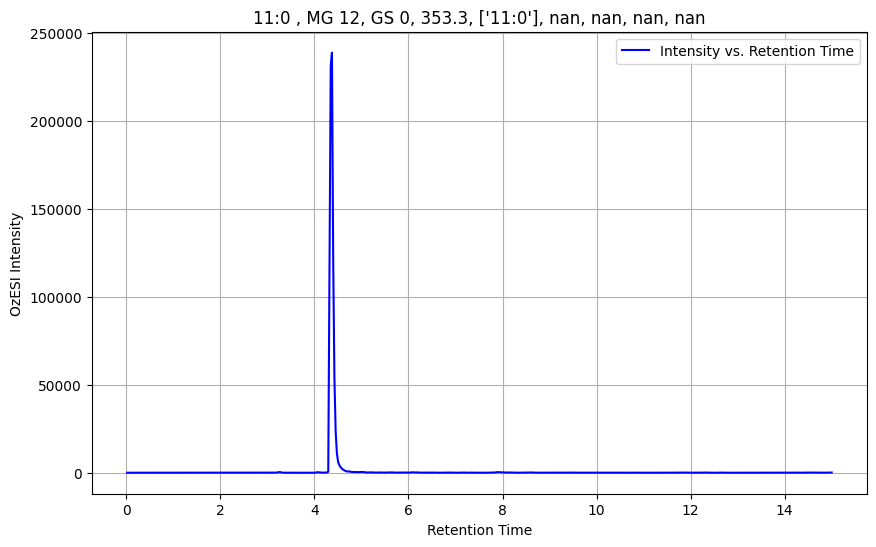

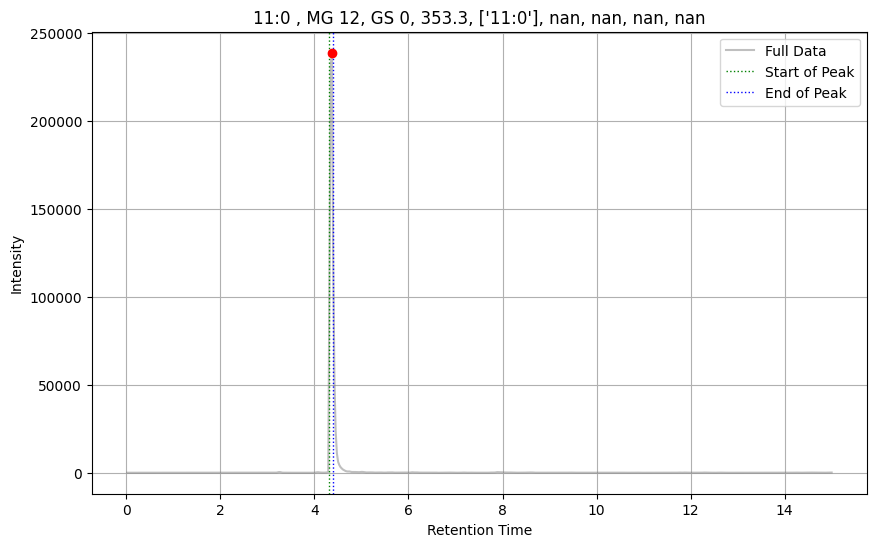

In [11]:
peak_analysis.plot_data_and_peaks(12, group_type='Match_Group')


# Directory to save plots

In [12]:
# Define the base directory for saving plots
base_plot_directory = 'Projects/AMP/results/fame_mix/plots/on/'

# Create the directory if it doesn't exist
if not os.path.exists(base_plot_directory):
    os.makedirs(base_plot_directory)
    print(f"Directory created at {base_plot_directory}")
else:
    print(f"Directory already exists at {base_plot_directory}")

# Define a function to generate filenames based on lipid names
def generate_filename(lipid_name):
    safe_lipid_name = lipid_name.replace("/", "-").replace(" ", "_").replace(":", "-")  # Ensure filename is safe for filesystems
    return f"{base_plot_directory}{safe_lipid_name}_OzON.png"



Directory already exists at Projects/AMP/results/fame_mix/plots/on/


In [13]:
peaks_df

,Lipid,Retention_Time,OzESI_Intensity,Match_Group,Group_Sample,Sample_ID,Parent_Ion,Product_Ion,FAC,Biology,Genotype,Cage,Mouse,Peak_Height,FWHM,Peak_Width,Peak_Area
0,NaN,4.086000,8.830661e+04,10,-1,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,339.3,183.0,[],NaN,NaN,NaN,NaN,8.830661e+04,4.417383e+04,3.024777,2.671078e+05
1,11:0,4.373650,2.386627e+05,12,0,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,353.3,183.0,[11:0],NaN,NaN,NaN,NaN,2.386627e+05,1.193519e+05,2.985645,7.125619e+05
2,12:0,4.818250,7.051023e+05,15,1,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,367.3,183.0,[12:0],NaN,NaN,NaN,NaN,7.051023e+05,3.525717e+05,3.481314,2.454683e+06
3,13:0,5.525183,5.041493e+05,18,2,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,381.3,183.0,[13:0],NaN,NaN,NaN,NaN,5.041493e+05,2.520953e+05,3.854480,1.943234e+06
4,14:1(9Z),5.314400,8.342626e+05,20,4,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,393.4,183.0,[14:1],NaN,NaN,NaN,NaN,8.342626e+05,4.171519e+05,3.700393,3.087099e+06
5,14:0,6.337033,1.573355e+06,21,3,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,395.4,183.0,[14:0],NaN,NaN,NaN,NaN,1.573355e+06,7.867077e+05,4.038937,6.354681e+06
6,15:1,6.073350,8.820002e+05,24,6,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,407.2,183.0,[15:1],NaN,NaN,NaN,NaN,8.820002e+05,4.410207e+05,3.952011,3.485674e+06
7,15:1,6.072883,1.323773e+06,25,6,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,407.4,183.0,[15:1],NaN,NaN,NaN,NaN,1.323773e+06,6.619096e+05,3.905462,5.169945e+06
8,15:0,7.279150,8.578846e+05,26,5,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,409.4,183.0,[15:0],NaN,NaN,NaN,NaN,8.578846e+05,4.289629e+05,4.393295,3.768940e+06
9,16:1,6.910983,1.813371e+06,28,8,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,421.4,183.0,[16:1],NaN,NaN,NaN,NaN,1.813371e+06,9.067083e+05,3.982506,7.221760e+06


# Save output of PeakAnalysis df to excel to be used for Ozone Compare Later

In [14]:
save_df_name = 'FAME_OzOFF.xlsx'
# save df to excel
peaks_df.to_excel(Project_results + save_df_name)
print(f'peaks_df saved to excel in results folder {Project_results}{save_df_name}')


peaks_df saved to excel in results folder ./Projects/AMP/results/fame_mix/FAME_OzOFF.xlsx


In [15]:
import os
import pandas as pd
import matplotlib.pyplot as plt

class Plot:
    def __init__(self, dataframe, plot_directory):
        self.dataframe = dataframe
        self.base_plot_directory = plot_directory
        self.ensure_directory_exists()

    def ensure_directory_exists(self):
        """Ensure the base directory for plots exists."""
        if not os.path.exists(self.base_plot_directory):
            os.makedirs(self.base_plot_directory)
            print(f"Directory created at {self.base_plot_directory}")
        else:
            print(f"Directory already exists at {self.base_plot_directory}")

    def generate_filename(self, lipid_name):
        """Generate a safe filename for saving plots based on the lipid name."""
        safe_lipid_name = lipid_name.replace("/", "-").replace(" ", "_").replace(":", "-")
        return f"{self.base_plot_directory}/{safe_lipid_name}_OzON.png"

    def scatter(self):
        """Create a scatter plot of Peak Area by Lipid."""
        grouped = self.dataframe.groupby('Lipid')
        fig, ax = plt.subplots(figsize=(10, 6))
        for (key, group), color in zip(grouped, plt.cm.tab20.colors):
            ax.scatter(group['Lipid'], group['Peak_Area'], label=str(key), color=color, s=100)

        ax.set_xlabel('Lipid')
        ax.set_ylabel('Peak Area')
        ax.set_title('Peak Area by Lipid')
        ax.set_xticks([i for i, _ in enumerate(grouped.groups.keys())])
        ax.set_xticklabels(grouped.groups.keys(), rotation='vertical')
        ax.legend(title='Lipid', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()

    def plot_bar(self):
        """Create a bar plot of Peak Area by Lipid."""
        grouped = self.dataframe.groupby('Lipid')
        fig, ax = plt.subplots(figsize=(10, 6))
        bar_width = 0.35
        num_groups = len(grouped.groups.keys())
        indices = list(range(num_groups))

        for i, (key, group) in enumerate(grouped):
            positions = [x + bar_width * i for x in indices]
            normalized_peak_areas = [group[group['Lipid'] == lipid]['Peak_Area'].sum() for lipid in grouped.groups.keys()]
            ax.bar(positions, normalized_peak_areas, width=bar_width, label=str(key))

        ticks_positions = [i + bar_width * (num_groups / 2) - bar_width / 2 for i in indices]
        ax.set_xticks(ticks_positions)
        ax.set_xticklabels(grouped.groups.keys(), rotation='vertical')
        ax.set_xlabel('Lipid')
        ax.set_ylabel('Peak Area')
        ax.set_title('Peak Area by Lipid')
        ax.legend(title='Lipid', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.show()


In [16]:
# Define the directory where the plots should be saved
plots_directory = 'Projects/AMP/results/fame_mix/plots/on/'

# Creating an instance of Plot class with the specified directory
plot_instance = Plot(dataframe=peaks_df, plot_directory=plots_directory)




Directory already exists at Projects/AMP/results/fame_mix/plots/on/


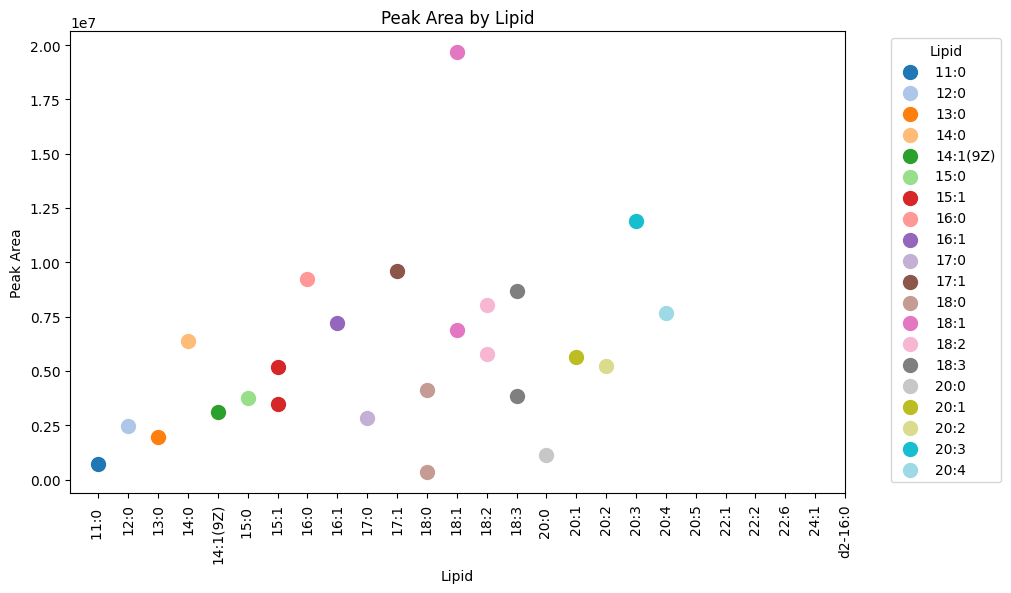

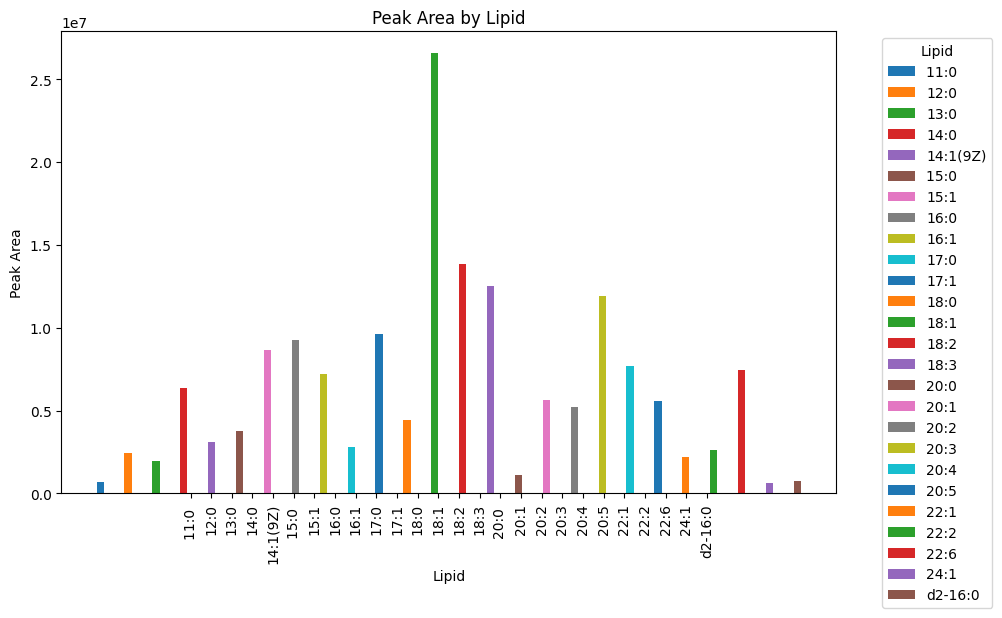

In [17]:
# Calling the scatter method to plot data
plot_instance.scatter()

# Calling the plot_bar method to display bar charts
plot_instance.plot_bar()

# OzoneCompare Class
### Input OzOFF and OzON df
### Match FAC and RT in OzON to those in OzOFF

In [18]:
import ast

class OzoneCompare:
    def __init__(self, directory, file_name_on, file_name_off):
        self.directory = directory
        self.file_name_on = file_name_on
        self.file_name_off = file_name_off
        self.load_data()

    def load_data(self):
        # Load data from Excel files
        self.OzON_df = pd.read_excel(self.directory + self.file_name_on)
        self.OzOFF_df = pd.read_excel(self.directory + self.file_name_off)
        # Drop 'Unnamed: 0' columns if they exist
        self.OzON_df.drop(columns='Unnamed: 0', errors='ignore', inplace=True)
        self.OzOFF_df.drop(columns='Unnamed: 0', errors='ignore', inplace=True)

    def match_dataframes(self):
        matched = pd.DataFrame(columns=self.OzON_df.columns.tolist() + ['FAC_OFF', 'Retention_Time_OFF'])
        for _, on_row in self.OzON_df.iterrows():
            on_fac_list = ast.literal_eval(on_row['FAC'])
            for _, off_row in self.OzOFF_df.iterrows():
                off_fac_list = ast.literal_eval(off_row['FAC'])
                for on_fac in on_fac_list:
                    if on_fac in off_fac_list and abs(on_row['Retention_Time'] - off_row['Retention_Time']) <= 0.5:
                        new_row = on_row.copy()
                        new_row['FAC_OFF'] = on_fac
                        new_row['Retention_Time_OFF'] = off_row['Retention_Time']
                        matched = matched.append(new_row, ignore_index=True)
        return matched

    def print_fac_and_off_match(self, df, match_group):
        group_data = df[df['Match_Group'] == match_group]
        if group_data.empty:
            print(f"No entries found for Match Group {match_group}.")
        else:
            print(f"Entries for Match Group {match_group}:")
            for index, row in group_data.iterrows():
                print(f"Index {index}: FAC - {row['FAC']}, FAC_OFF - {row['FAC_OFF']}")

    def filter_contains_colon_zero(self, df):
        return df[df['FAC_OFF'].apply(lambda x: ':0' not in x)]

# Example of using the class
directory = 'Projects/AMP/results/fame_mix/'
file_name_on = 'FAME_OzON.xlsx'
file_name_off = 'FAME_OzOFF.xlsx'

# Create an instance of the class
ozone_compare = OzoneCompare(directory, file_name_on, file_name_off)

# Match dataframes
matched_df = ozone_compare.match_dataframes()

# Print matches for a specific match group
ozone_compare.print_fac_and_off_match(matched_df, 2)

# Filter and print DataFrame rows where FAC_OFF does not contain ':0'
filtered_df = ozone_compare.filter_contains_colon_zero(matched_df)
filtered_df


Entries for Match Group 2:
Index 2: FAC - ['6:0', '20:5', '20:4', '12:1', '13:1', '14:1', '15:1', '16:1', '17:1', '18:1'], FAC_OFF - 16:1
Index 3: FAC - ['6:0', '20:5', '20:4', '12:1', '13:1', '14:1', '15:1', '16:1', '17:1', '18:1'], FAC_OFF - 20:5
Index 4: FAC - ['6:0', '20:5', '20:4', '12:1', '13:1', '14:1', '15:1', '16:1', '17:1', '18:1'], FAC_OFF - 17:1
Index 5: FAC - ['6:0', '20:5', '20:4', '12:1', '13:1', '14:1', '15:1', '16:1', '17:1', '18:1'], FAC_OFF - 20:4


,Lipid,Retention_Time,OzESI_Intensity,Match_Group,Group_Sample,Sample_ID,Parent_Ion,Product_Ion,FAC,Biology,Genotype,Cage,Mouse,Peak_Height,FWHM,Peak_Width,Peak_Area,FAC_OFF,Retention_Time_OFF
0,"22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3,n-6,n-9,n-12,n...",7.579050,64931.144531,1,43,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,269.1,183,"['22:6', '12:1', '13:1', '14:1', '15:1', '16:1...",NaN,NaN,NaN,NaN,64931.144531,32486.192266,3.429790,2.227002e+05,17:1,7.801083
1,"22:6 (4Z,7Z,10Z,13Z,16Z,19Z)n-3,n-6,n-9,n-12,n...",7.579050,64931.144531,1,43,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,269.1,183,"['22:6', '12:1', '13:1', '14:1', '15:1', '16:1...",NaN,NaN,NaN,NaN,64931.144531,32486.192266,3.429790,2.227002e+05,22:6,7.558583
2,"6:0 / 20:5 (5Z,8Z,11Z,14Z,17Z)n-3,n-6,n-9,n-12...",6.686683,64325.605469,2,48,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,283.1,183,"['6:0', '20:5', '20:4', '12:1', '13:1', '14:1'...",NaN,NaN,NaN,NaN,64325.605469,32196.472736,3.489308,2.244519e+05,16:1,6.910983
3,"6:0 / 20:5 (5Z,8Z,11Z,14Z,17Z)n-3,n-6,n-9,n-12...",6.686683,64325.605469,2,48,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,283.1,183,"['6:0', '20:5', '20:4', '12:1', '13:1', '14:1'...",NaN,NaN,NaN,NaN,64325.605469,32196.472736,3.489308,2.244519e+05,20:5,6.669867
4,"6:0 / 20:5 (5Z,8Z,11Z,14Z,17Z)n-3,n-6,n-9,n-12...",7.631067,91986.468750,2,48,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,283.1,183,"['6:0', '20:5', '20:4', '12:1', '13:1', '14:1'...",NaN,NaN,NaN,NaN,91986.468750,46013.814377,3.721541,3.423315e+05,17:1,7.801083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,20:1,10.655467,625269.312500,43,21,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,477.4,183,['20:1'],NaN,NaN,NaN,NaN,625269.312500,312673.366253,5.567599,3.481249e+06,20:1,10.629233
113,20:0 / 21:1n-2 / 22:1n-3,12.281450,147127.203125,44,20,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,479.4,183,"['20:0', '21:1', '22:1']",NaN,NaN,NaN,NaN,147127.203125,73680.271568,8.632935,1.270140e+06,22:1,12.541983
114,22:6,7.584817,314451.750000,46,37,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,495.4,183,['22:6'],NaN,NaN,NaN,NaN,314451.750000,157246.545002,3.533352,1.111069e+06,22:6,7.558583
115,22:2,11.204517,164623.828125,47,36,11152023_FAMEmix_AMP_1000x_0.1uMd216-0_MRMs_O3...,503.4,183,['22:2'],NaN,NaN,NaN,NaN,164623.828125,82341.794065,6.204903,1.021475e+06,22:2,11.178317
